In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Menampilkan Dataset
df = pd.read_excel("dataset1.xlsx")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id_transaksi,item
0,1,"Daia,Indomie Goreng"
1,2,"Sedap Soto,Telur"
2,3,"Aqua Gelas,Montea,Teh Rio"
3,4,"Giv,Lifebuoy"
4,5,"Gula,Kopi Kapal Api,Beras"
...,...,...
120,121,"Beras Super,Shampo Pantene"
121,122,"Minyak Goreng,Gula,Kopi Kapal Api"
122,123,"Indomie Goreng,Telur"
123,124,"Indomie Goreng,Sakura Soto,Intermie Goreng"


##PREPROCESSING

In [3]:
# Buat daftar kosong untuk menyimpan nilai kolom
column_list = []

# Ulangi nilai di kolom 'item' dan tambahkan ke daftar
for value in df['item']:
    # Periksa apakah nilainya berupa string
    if isinstance(value, str):
        # Pisahkan nilai jika berupa string
        my_list = value.split(",")
        column_list.append(my_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Menggunakan TransactionEncoder untuk mengubah data transaksi menjadi format one-hot encoded
te = TransactionEncoder()
te_ary = te.fit(column_list).transform(column_list)
df_ = pd.DataFrame(te_ary, columns=te.columns_)
df_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dilan,Korek Api,Masako,Momogi,Pop Ice Strawbery,Sedotan,Susu,Susu Omela,Terigu,Ajinomoto,...,Telur,Terasi,Terigu,Tipe X,Tisue Basah,Tisue Paseo,Torabika Capucino,Vixal,Wipol,YouC
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##APRIORI

In [19]:
# Mencari itemset yang sering muncul menggunakan algoritma Apriori dengan min_support = 1%
support_apriori = apriori(df_, min_support=0.05, use_colnames=True)
support_apriori.sort_values(by='support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
7,0.152,(Telur)
2,0.136,(Indomie Goreng)
1,0.128,(Gula)
5,0.088,(Minyak Goreng)
3,0.072,(Intermie Goreng)
9,0.072,"(Indomie Goreng, Telur)"
4,0.064,(Kopi Kapal Api)
6,0.064,(Sakura Soto)
8,0.064,(Terigu)
0,0.056,(Aqua Gelas)


In [20]:
conf_apriori = association_rules(support_apriori, metric="confidence", min_threshold=0.05)
conf_apriori.sort_values(by='confidence', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Telur),(Indomie Goreng),0.152,0.136,0.072,0.473684,3.482972,0.051328,1.6416,0.840671
0,(Indomie Goreng),(Telur),0.136,0.152,0.072,0.529412,3.482972,0.051328,1.8020,0.825103


In [21]:
# Start the timer
import time
start_time = time.time()

frequent_apriori = apriori(df_, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_apriori, metric="confidence", min_threshold=0.05)

# Calculate the elapsed time
elapsed_time_apriori = time.time() - start_time
elapsed_time_apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.02442646026611328

##ECLAT

In [22]:
!pip install pyECLAT

from pyECLAT import ECLAT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Memuat transaksi DataFrame ke kelas ECLAT
data_kolom = pd.DataFrame(column_list).head(125)
data_kolom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3
0,Daia,Indomie Goreng,None,None
1,Sedap Soto,Telur,None,None
2,Aqua Gelas,Montea,Teh Rio,None
3,Giv,Lifebuoy,None,None
4,Gula,Kopi Kapal Api,Beras,None
...,...,...,...,...
120,Beras Super,Shampo Pantene,None,None
121,Minyak Goreng,Gula,Kopi Kapal Api,None
122,Indomie Goreng,Telur,None,None
123,Indomie Goreng,Sakura Soto,Intermie Goreng,None


In [27]:
# Start the timer
start_time = time.time()

# ECLAT expects data as a list of lists (not a DataFrame)
eclat_instance = ECLAT(data=data_kolom, verbose=True)
rule_indices, rule_supports = eclat_instance.fit(min_support=0.05, min_combination=1, max_combination=1)

# Mengonversi hasil ke dalam DataFrame
frequent_eclat = pd.DataFrame(list(zip(rule_indices, rule_supports)), columns=['Itemset', 'Support'])

elapsed_time_eclat = time.time() - start_time
elapsed_time_eclat


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 129/129 [00:00<00:00, 755.64it/s]


Combination 1 by 1


9it [00:00, 35.10it/s]


1.0536155700683594

In [28]:
result = pd.DataFrame(rule_supports.items(),columns=['Item', 'support'])
result.sort_values(by=['support'], ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,support
8,Telur,0.152
1,Indomie Goreng,0.136
0,Gula,0.128
2,Minyak Goreng,0.088
3,Intermie Goreng,0.072
5,Kopi Kapal Api,0.064
6,Sakura Soto,0.064
7,Terigu,0.064
4,Aqua Gelas,0.056


In [32]:
# Eclat Support & confidence
frequent_itemsets = apriori(df_, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.05)
df_Eclat = rules.sort_values('support', ascending=False)
df_Eclat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Indomie Goreng),(Telur),0.136,0.152,0.072,0.529412,3.482972,0.051328,1.8020,0.825103
1,(Telur),(Indomie Goreng),0.152,0.136,0.072,0.473684,3.482972,0.051328,1.6416,0.840671


##Menampilkan Perbandingan Waktu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


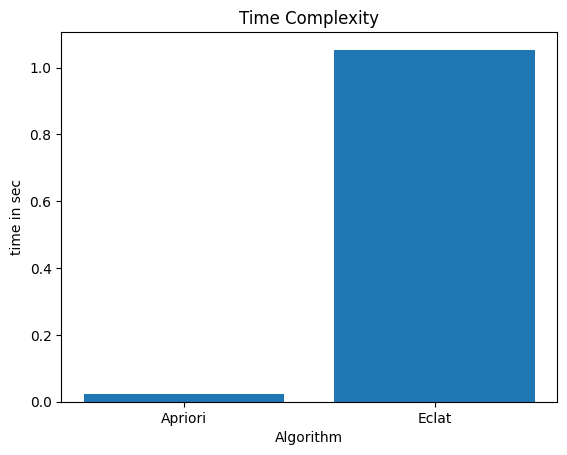

In [30]:
import matplotlib.pyplot as plt
import plotly.express as px

x = ["Apriori", "Eclat"]
y = [elapsed_time_apriori, elapsed_time_eclat]

plt.bar(x, y)
plt.xlabel("Algorithm")
plt.ylabel("time in sec")
plt.title("Time Complexity")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
